In [14]:
from joblib import Parallel, delayed
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from utils import *
from tqdm import tqdm
import seaborn as sns

In [2]:
files = list(glob.glob('gecco/*'))
print(len(files))

1200


In [3]:
generalization_dict = {}
for file in tqdm(files):
    df = pd.read_parquet(path=file)
    meta_model = df.metamodel.unique()[0]
    problem_out = df.removed_function.unique()[0]
    feature_group = df.feature_group.unique()[0]
    vd = df.groupby('alpha').mean(numeric_only=True).reset_index().sort_values('alpha')
    generalization_dict[(meta_model, problem_out, feature_group)] = (list(vd.alpha), list(vd.pairwise_error))

100%|██████████| 1200/1200 [28:28<00:00,  1.42s/it] 


In [4]:
errors = {}
feature_groups = list(np.unique([x[2] for x in list(generalization_dict.keys())]))
meta_models = list(np.unique([x[0] for x in list(generalization_dict.keys())]))


meta_model = 'RandomForestRegressor'
for feature_group in feature_groups:
    subset = [x for x in list(generalization_dict.keys()) if x[2]==feature_group and x[0]==meta_model]
    alphas = np.array([generalization_dict[x][0] for x in subset]).mean(axis=0)
    pw_errors = np.array([generalization_dict[x][1] for x in subset]).mean(axis=0)
    errors[str(feature_group)] = (alphas, pw_errors)
    
meta_model = 'DummyRegressor'
feature_group = 'all'
subset = [x for x in list(generalization_dict.keys()) if x[2]==feature_group and x[0]==meta_model]
alphas = np.array([generalization_dict[x][0] for x in subset]).mean(axis=0)
pw_errors = np.array([generalization_dict[x][1] for x in subset]).mean(axis=0)
errors['dummy'] = (alphas, pw_errors)

In [5]:
meta_models

['DummyRegressor', 'RandomForestRegressor']

In [6]:
#feature_groups = df.feature_group.unique()
#errors = {}
#vd = df.query('metamodel=="DummyRegressor"').groupby('alpha').mean(numeric_only=True).reset_index()
#errors['dummy'] = (list(vd.alpha), list(vd.pairwise_error))
#for feature_group in feature_groups:
#    print(feature_group)
#    vrf = df.query(f'metamodel=="RandomForestRegressor" and feature_group=="{feature_group}"').groupby('alpha').mean(numeric_only=True).reset_index()
#    errors[feature_group] = (list(vrf.alpha), list(vrf.pairwise_error))

all
all_no_norm
all_norm
cm_angle
cm_conv
cm_grad
disp
ela_distr
ela_level
ela_meta
ic
limo
nbc
norm_cm_angle
norm_cm_conv
norm_cm_grad
norm_disp
norm_ela_distr
norm_ela_level
norm_ela_meta
norm_ic
norm_limo
norm_nbc
norm_pca
pca
dummy


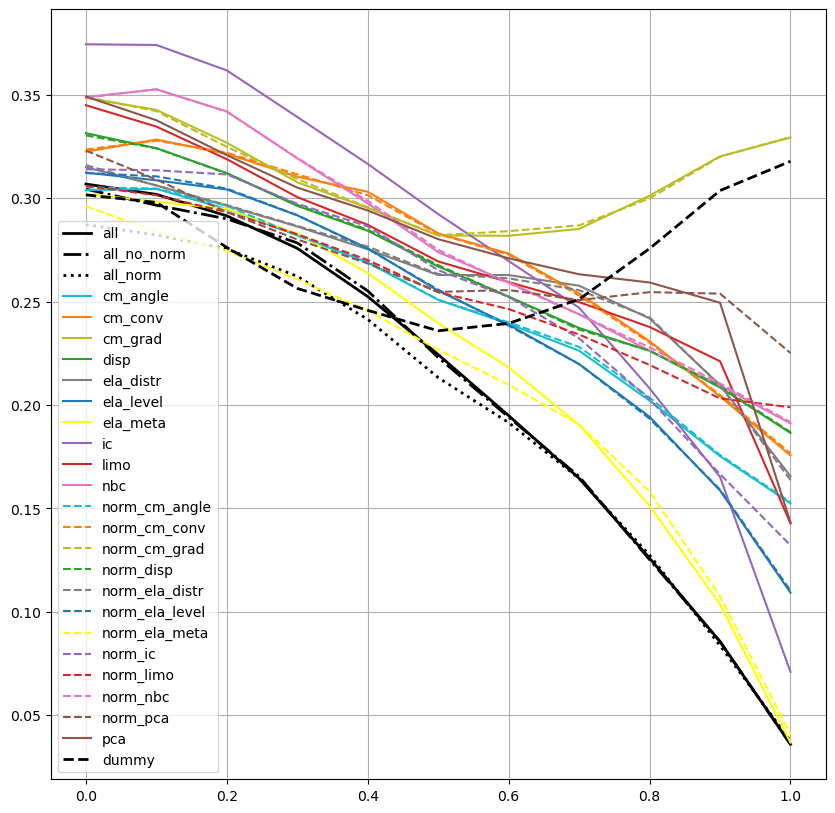

In [7]:
mapped = {
    'dummy': {'linestyle': '--', 'color':'black', 'linewidth':2},
    'all': {'linestyle': '-', 'color':'black', 'linewidth':2},
    'all_no_norm': {'linestyle': '-.', 'color':'black', 'linewidth':2},
    'all_norm': {'linestyle': ':', 'color':'black', 'linewidth':2},
    'ela_level': {'color':'tab:blue'},
    'norm_ela_level': {'linestyle': '--', 'color':'tab:blue'},
    'cm_conv': {'color':'tab:orange'},
    'norm_cm_conv': {'linestyle': '--', 'color':'tab:orange'},
    'disp': {'color':'tab:green'},
    'norm_disp': {'linestyle': '--', 'color':'tab:green'},
    'limo': {'color':'tab:red'},
    'norm_limo': {'linestyle': '--', 'color':'tab:red'},
    'ic': {'color':'tab:purple'},
    'norm_ic': {'linestyle': '--', 'color':'tab:purple'},
    'pca': {'color':'tab:brown'},
    'norm_pca': {'linestyle': '--', 'color':'tab:brown'},
    'nbc': {'color':'tab:pink'},
    'norm_nbc': {'linestyle': '--', 'color':'tab:pink'},
    'ela_distr': {'color':'tab:gray'},
    'norm_ela_distr': {'linestyle': '--', 'color':'tab:gray'},
    'cm_grad': {'color':'tab:olive'},
    'norm_cm_grad': {'linestyle': '--', 'color':'tab:olive'},
    'cm_angle': {'color':'tab:cyan'},
    'norm_cm_angle': {'linestyle': '--', 'color':'tab:cyan'},
    'ela_meta': {'color':'yellow'},
    'norm_ela_meta': {'linestyle': '--', 'color':'yellow'},
    
}

plt.figure(figsize=(10, 10))
for feature_group, (alphas, values) in errors.items():
    print(feature_group)
    plt.plot(alphas, values, label=feature_group, **mapped[feature_group])
plt.legend()
plt.grid()
plt.savefig(f'figures/feature_group_error.pdf', bbox_inches='tight', pad_inches=0)

In [8]:
lio_errors = []
lpo_errors = []
for feature_group, (alphas, values) in errors.items():
    lpo_errors.append((values[0], feature_group))
    lio_errors.append((values[-1], feature_group))

In [9]:
lio_errors

[(0.035871376811594205, 'all'),
 (0.0358713768115942, 'all_no_norm'),
 (0.03754347826086956, 'all_norm'),
 (0.15241123188405797, 'cm_angle'),
 (0.17560507246376814, 'cm_conv'),
 (0.329375, 'cm_grad'),
 (0.18645652173913044, 'disp'),
 (0.1654963768115942, 'ela_distr'),
 (0.10921557971014495, 'ela_level'),
 (0.03670471014492754, 'ela_meta'),
 (0.07091123188405797, 'ic'),
 (0.14269021739130433, 'limo'),
 (0.19106884057971016, 'nbc'),
 (0.15300181159420292, 'norm_cm_angle'),
 (0.17666123188405794, 'norm_cm_conv'),
 (0.32964311594202894, 'norm_cm_grad'),
 (0.18687862318840578, 'norm_disp'),
 (0.16367934782608695, 'norm_ela_distr'),
 (0.11014311594202898, 'norm_ela_level'),
 (0.04075181159420289, 'norm_ela_meta'),
 (0.13212862318840576, 'norm_ic'),
 (0.198893115942029, 'norm_limo'),
 (0.1917119565217391, 'norm_nbc'),
 (0.2251250000000001, 'norm_pca'),
 (0.14325181159420292, 'pca'),
 (0.31788949275362316, 'dummy')]

In [10]:
lpo_errors

[(0.30686413043478267, 'all'),
 (0.3044166666666667, 'all_no_norm'),
 (0.28725724637681155, 'all_norm'),
 (0.3039148550724638, 'cm_angle'),
 (0.3225416666666668, 'cm_conv'),
 (0.34860144927536235, 'cm_grad'),
 (0.33147282608695655, 'disp'),
 (0.3150054347826087, 'ela_distr'),
 (0.3124057971014493, 'ela_level'),
 (0.3021485507246377, 'ela_meta'),
 (0.3744891304347826, 'ic'),
 (0.34500905797101455, 'limo'),
 (0.34892391304347825, 'nbc'),
 (0.30533333333333335, 'norm_cm_angle'),
 (0.3235815217391304, 'norm_cm_conv'),
 (0.3489728260869566, 'norm_cm_grad'),
 (0.3304202898550725, 'norm_disp'),
 (0.31602536231884065, 'norm_ela_distr'),
 (0.312213768115942, 'norm_ela_level'),
 (0.2961521739130435, 'norm_ela_meta'),
 (0.3140271739130435, 'norm_ic'),
 (0.3059710144927536, 'norm_limo'),
 (0.34874275362318846, 'norm_nbc'),
 (0.32305072463768114, 'norm_pca'),
 (0.34920289855072467, 'pca'),
 (0.3016304347826087, 'dummy')]

In [17]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [15]:
paired_palette = sns.color_palette("Paired").as_hex()

# Display the hex colors
for color in paired_palette:
    print(color)

#a6cee3
#1f78b4
#b2df8a
#33a02c
#fb9a99
#e31a1c
#fdbf6f
#ff7f00
#cab2d6
#6a3d9a
#ffff99
#b15928


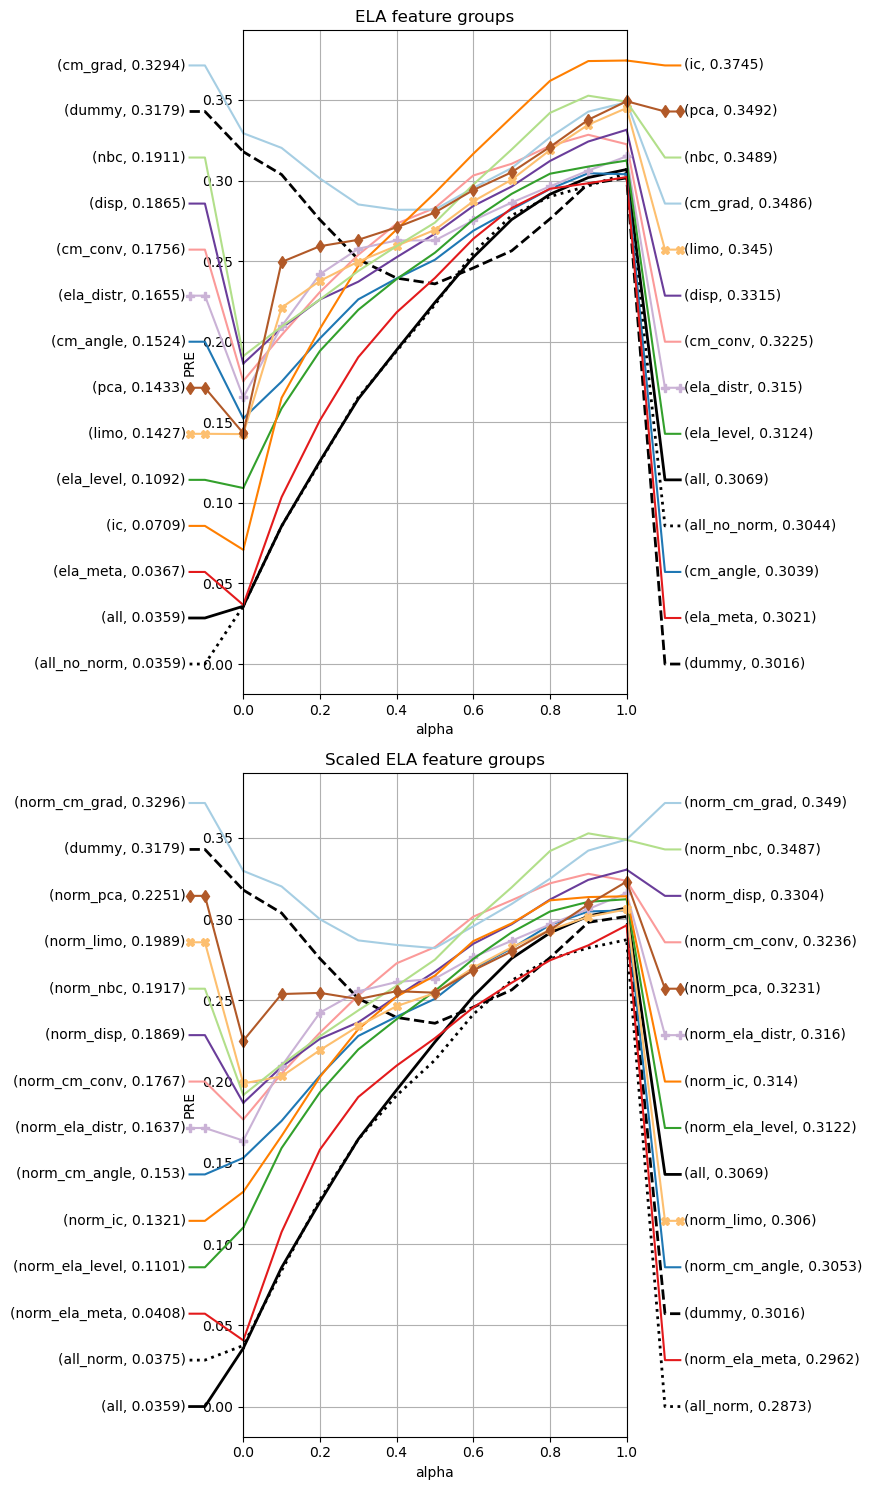

In [38]:
mapped = {
    'dummy': {'linestyle': '--', 'color':'black', 'linewidth':2},
    'all': {'linestyle': '-', 'color':'black', 'linewidth':2},
    'all_no_norm': {'linestyle': ':', 'color':'black', 'linewidth':2},
    'all_norm': {'linestyle': ':', 'color':'black', 'linewidth':2},
    'ela_level': {'color':'#33a02c'},
    'norm_ela_level': {'color':'#33a02c'},
    'cm_conv': {'color':'#fb9a99'},
    'norm_cm_conv': {'color':'#fb9a99'},
    'disp': {'color':'#6a3d9a'},
    'norm_disp': {'color':'#6a3d9a'},
    'limo': {'color':'#fdbf6f', 'marker':'X'},
    'norm_limo': {'color':'#fdbf6f', 'marker':'X'},
    'ic': {'color':'#ff7f00'},
    'norm_ic': {'color':'#ff7f00'},
    'pca': {'color':'#b15928', 'marker':'d'},
    'norm_pca': {'color':'#b15928', 'marker':'d'},
    'nbc': {'color':'#b2df8a'},
    'norm_nbc': {'color':'#b2df8a'},
    'ela_distr': {'color':'#cab2d6', 'marker':'P'},
    'norm_ela_distr': {'color':'#cab2d6', 'marker':'P'},
    'cm_grad': {'color':'#a6cee3'},
    'norm_cm_grad': {'color':'#a6cee3'},
    'cm_angle': {'color':'#1f78b4'},
    'norm_cm_angle': {'color':'#1f78b4'},
    'ela_meta': {'color':'#e31a1c'},
    'norm_ela_meta': {'color':'#e31a1c'},
    
}

fig, axs = plt.subplots(2, 1, figsize=(10, 15))  # 1 row, 2 columns
from matplotlib.lines import Line2D
normed_features = ["all", "all_norm", "dummy", "norm_cm_angle", "norm_cm_conv", "norm_cm_grad", "norm_disp", "norm_ela_distr", "norm_ela_level", "norm_ela_meta", "norm_ic", "norm_limo", "norm_nbc", "norm_pca"]
regular_features = ["all", "all_no_norm", "dummy", "cm_angle", "cm_conv", "cm_grad", "disp", "ela_distr", "ela_level", "ela_meta", "ic", "limo", "nbc", "pca"]
     
filtered_lpo = sorted([x for x in lpo_errors if x[1] in regular_features])
filtered_lio = sorted([x for x in lio_errors if x[1] in regular_features])

round_numbers = 4
text_font_size = 10

for feature in regular_features:
    (alphas, values) = errors[feature]
    alphas, values = list(alphas), list(values)

    index = [i for i, (_, element) in enumerate(filtered_lpo) if element == feature]
    pos = index[0]/(2.5*len(filtered_lpo))
    axs[0].text(1.15, pos, f'({feature}, {round(values[0], round_numbers)})', fontsize=text_font_size, ha='left', va='center')
    
    index = [i for i, (_, element) in enumerate(filtered_lio) if element == feature]
    pos_lio = index[0]/(2.5*len(filtered_lio))
    axs[0].text(-0.15, pos_lio, f'({feature}, {round(values[-1], round_numbers)})', fontsize=text_font_size, ha='right', va='center')

    v = values
    a = list(reversed(alphas))
    axs[0].plot(a, v, label=feature, **mapped[feature])
    
    x = [pos, pos, values[0]]
    y = [1.14, 1.1, a[0]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[0].add_line(line)
    
    x = [pos_lio, pos_lio, values[-1]]
    y = [-0.14, -0.1, a[-1]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[0].add_line(line)
    
    axs[0].set_xlim(0, 1)
    axs[0].set_xlabel('alpha')
    axs[0].set_ylabel('PRE')

axs[0].grid()
axs[0].set_title("ELA feature groups")
        
filtered_lpo = sorted([x for x in lpo_errors if x[1] in normed_features])
filtered_lio = sorted([x for x in lio_errors if x[1] in normed_features])   

for feature in normed_features:
    (alphas, values) = errors[feature]
    alphas, values = list(alphas), list(values)

    index = [i for i, (_, element) in enumerate(filtered_lpo) if element == feature]
    pos = index[0]/(2.5*len(filtered_lpo))
    axs[1].text(1.15, pos, f'({feature}, {round(values[0], round_numbers)})', fontsize=text_font_size, ha='left', va='center')
    
    index = [i for i, (_, element) in enumerate(filtered_lio) if element == feature]
    pos_lio = index[0]/(2.5*len(filtered_lio))
    axs[1].text(-0.15, pos_lio, f'({feature}, {round(values[-1], round_numbers)})', fontsize=text_font_size, ha='right', va='center')

    v = values
    a = list(reversed(alphas))
    axs[1].plot(a, v, label=feature, **mapped[feature])
    
    x = [pos, pos, values[0]]
    y = [1.14, 1.1, a[0]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[1].add_line(line)
    
    x = [pos_lio, pos_lio, values[-1]]
    y = [-0.14, -0.1, a[-1]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[1].add_line(line)
    
    axs[1].set_xlim(0, 1)
    axs[1].set_xlabel('alpha')
    axs[1].set_ylabel('PRE')


axs[1].grid()
axs[1].set_title("Scaled ELA feature groups")


plt.tight_layout()
plt.savefig('figures/feature_group_error_subplots.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

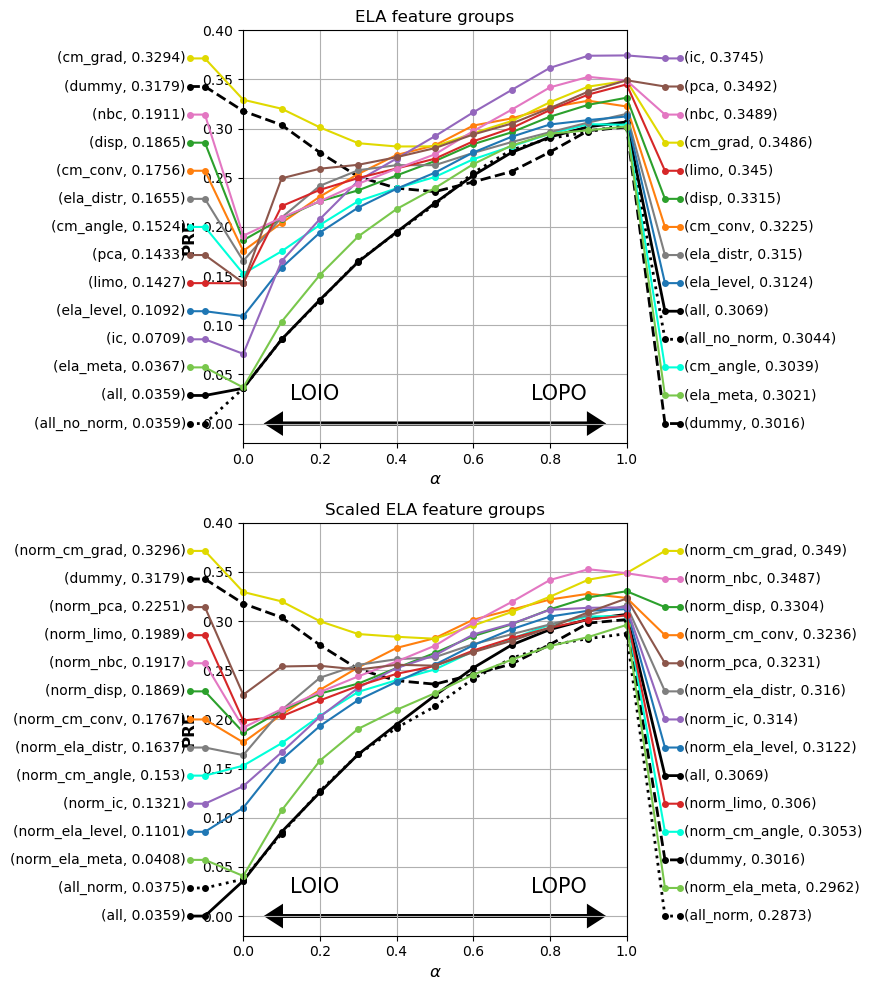

In [75]:
mapped = {
    'dummy': {'linestyle': '--', 'color':'black', 'linewidth':2, 'marker':'o', 'markersize': 4},
    'all': {'linestyle': '-', 'color':'black', 'linewidth':2, 'marker':'o', 'markersize': 4},
    'all_no_norm': {'linestyle': ':', 'color':'black', 'linewidth':2, 'marker':'o', 'markersize': 4},
    'all_norm': {'linestyle': ':', 'color':'black', 'linewidth':2, 'marker':'o', 'markersize': 4},
    'ela_level': {'color':'tab:blue', 'marker':'o', 'markersize': 4},
    'norm_ela_level': {'color':'tab:blue', 'marker':'o', 'markersize': 4},
    'cm_conv': {'color':'tab:orange', 'marker':'o', 'markersize': 4},
    'norm_cm_conv': {'color':'tab:orange', 'marker':'o', 'markersize': 4},
    'disp': {'color':'tab:green', 'marker':'o', 'markersize': 4},
    'norm_disp': {'color':'tab:green', 'marker':'o', 'markersize': 4},
    'limo': {'color':'tab:red', 'marker':'o', 'markersize': 4},
    'norm_limo': {'color':'tab:red', 'marker':'o', 'markersize': 4},
    'ic': {'color':'tab:purple', 'marker':'o', 'markersize': 4},
    'norm_ic': {'color':'tab:purple', 'marker':'o', 'markersize': 4},
    'pca': {'color':'tab:brown', 'marker':'o', 'markersize': 4},
    'norm_pca': {'color':'tab:brown', 'marker':'o', 'markersize': 4},
    'nbc': {'color':'tab:pink', 'marker':'o', 'markersize': 4},
    'norm_nbc': {'color':'tab:pink', 'marker':'o', 'markersize': 4},
    'ela_distr': {'color':'tab:gray', 'marker':'o', 'markersize': 4},
    'norm_ela_distr': {'color':'tab:gray', 'marker':'o', 'markersize': 4},
    'cm_grad': {'color':'#e0d900', 'marker':'o', 'markersize': 4},
    'norm_cm_grad': {'color':'#e0d900', 'marker':'o', 'markersize': 4},
    'cm_angle': {'color':'#00ffd9', 'marker':'o', 'markersize': 4},
    'norm_cm_angle': {'color':'#00ffd9', 'marker':'o', 'markersize': 4},
    'ela_meta': {'color':'#79c74c', 'marker':'o', 'markersize': 4},
    'norm_ela_meta': {'color':'#79c74c', 'marker':'o', 'markersize': 4},
    
}

fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # 1 row, 2 columns
from matplotlib.lines import Line2D
normed_features = ["all", "all_norm", "dummy", "norm_cm_angle", "norm_cm_conv", "norm_cm_grad", "norm_disp", "norm_ela_distr", "norm_ela_level", "norm_ela_meta", "norm_ic", "norm_limo", "norm_nbc", "norm_pca"]
regular_features = ["all", "all_no_norm", "dummy", "cm_angle", "cm_conv", "cm_grad", "disp", "ela_distr", "ela_level", "ela_meta", "ic", "limo", "nbc", "pca"]
     
filtered_lpo = sorted([x for x in lpo_errors if x[1] in regular_features])
filtered_lio = sorted([x for x in lio_errors if x[1] in regular_features])

round_numbers = 4
text_font_size = 10

for feature in regular_features:
    (alphas, values) = errors[feature]
    alphas, values = list(alphas), list(values)

    index = [i for i, (_, element) in enumerate(filtered_lpo) if element == feature]
    pos = index[0]/(2.5*len(filtered_lpo))
    axs[0].text(1.15, pos, f'({feature}, {round(values[0], round_numbers)})', fontsize=text_font_size, ha='left', va='center')
    
    index = [i for i, (_, element) in enumerate(filtered_lio) if element == feature]
    pos_lio = index[0]/(2.5*len(filtered_lio))
    axs[0].text(-0.15, pos_lio, f'({feature}, {round(values[-1], round_numbers)})', fontsize=text_font_size, ha='right', va='center')
    
    v = values
    a = list(reversed(alphas))
    axs[0].plot(a, v, label=feature, **mapped[feature])
    
    x = [pos, pos, values[0]]
    y = [1.14, 1.1, a[0]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[0].add_line(line)
    
    x = [pos_lio, pos_lio, values[-1]]
    y = [-0.14, -0.1, a[-1]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[0].add_line(line)
    
    axs[0].set_xlim(0, 1)
    axs[0].set_ylim(-0.02, 0.4)
    axs[0].set_xlabel(r'$\alpha$', fontsize=12, fontweight='bold')
    axs[0].set_ylabel('PRE', fontsize=12, fontweight='bold')

axs[0].grid()
axs[0].arrow(0.1, 0, 0.8, 0, head_width=0.02, head_length=0.04, fc='black', ec='black', lw=2)
axs[0].arrow(0.9, 0, -0.8, 0, head_width=0.02, head_length=0.04, fc='black', ec='black', lw=2)

axs[0].text(0.25, 0.03, f'LOIO', fontsize=int(1.5*text_font_size), ha='right', va='center')
axs[0].text(0.75, 0.03, f'LOPO', fontsize=int(1.5*text_font_size), ha='left', va='center')

axs[0].set_title("ELA feature groups")
        
filtered_lpo = sorted([x for x in lpo_errors if x[1] in normed_features])
filtered_lio = sorted([x for x in lio_errors if x[1] in normed_features])

for feature in normed_features:
    (alphas, values) = errors[feature]
    alphas, values = list(alphas), list(values)

    index = [i for i, (_, element) in enumerate(filtered_lpo) if element == feature]
    pos = index[0]/(2.5*len(filtered_lpo))
    axs[1].text(1.15, pos, f'({feature}, {round(values[0], round_numbers)})', fontsize=text_font_size, ha='left', va='center')
    
    index = [i for i, (_, element) in enumerate(filtered_lio) if element == feature]
    pos_lio = index[0]/(2.5*len(filtered_lio))
    axs[1].text(-0.15, pos_lio, f'({feature}, {round(values[-1], round_numbers)})', fontsize=text_font_size, ha='right', va='center')
    
    v = values
    a = list(reversed(alphas))
    axs[1].plot(a, v, label=feature, **mapped[feature])
    
    x = [pos, pos, values[0]]
    y = [1.14, 1.1, a[0]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[1].add_line(line)
    
    x = [pos_lio, pos_lio, values[-1]]
    y = [-0.14, -0.1, a[-1]]
    line = Line2D(y, x, **mapped[feature])
    line.set_clip_on(False)
    axs[1].add_line(line)
    
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(-0.02, 0.4)
    axs[1].set_xlabel(r'$\alpha$', fontsize=12, fontweight='bold')
    axs[1].set_ylabel('PRE', fontsize=12, fontweight='bold')
   
axs[1].grid()
axs[1].arrow(0.1, 0, 0.8, 0, head_width=0.02, head_length=0.04, fc='black', ec='black', lw=2)
axs[1].arrow(0.9, 0, -0.8, 0, head_width=0.02, head_length=0.04, fc='black', ec='black', lw=2)

axs[1].text(0.25, 0.03, f'LOIO', fontsize=int(1.5*text_font_size), ha='right', va='center')
axs[1].text(0.75, 0.03, f'LOPO', fontsize=int(1.5*text_font_size), ha='left', va='center')

axs[1].set_title("Scaled ELA feature groups")


plt.tight_layout()
plt.savefig('figures/feature_group_error_subplots_gina.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
errors_gina={k:v[1] for k,v in errors.items()}

In [ ]:
t=pd.DataFrame(errors_gina).T

In [ ]:
t.columns=[c/10 for c in t.columns]

In [ ]:
t['is_norm']=['norm' in i and not '_no_norm' in i for i in t.index]
t['feature']=[i.replace('_no_norm','').replace('_norm','').replace('norm_','') for i in t.index]

In [ ]:
t=t.set_index(['is_norm','feature'])

In [ ]:
t=t.reset_index().melt(['is_norm','feature'],t.columns )

In [ ]:
t

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(
    data=t.query('variable in [0,0.2,0.6,0.8,1.0]'), x="feature", y='value', hue="is_norm",
    kind="violin", split=True, col='variable'
)

In [ ]:
lio_errors = sorted(lio_errors)
lio_errors

In [ ]:
lpo_errors = sorted(lpo_errors)
lpo_errors

In [ ]:
#plt.figure(figsize=(15, 15))
#
#for feature_group in feature_groups:
#    print(feature_group)
#    vrf = df.query(f'metamodel=="RandomForestRegressor" and feature_group=="{feature_group}"').sample(10000).groupby('alpha').mean(numeric_only=True).reset_index()
#    plt.plot(list(vrf.alpha), list(vrf.pairwise_error), label=feature_group)
#vd = df.query('metamodel=="DummyRegressor"').sample(10000).groupby('alpha').mean(numeric_only=True).reset_index()
#plt.plot(list(vd.alpha), list(vd.pairwise_error), label='dummy')
#plt.legend()
#plt.show()

In [ ]:
#vd = df.query('metamodel=="DummyRegressor"').sample(10000).groupby('alpha').mean(numeric_only=True).reset_index()
#plt.plot(list(vd.alpha), list(vd.pairwise_error))
#vrf = df.query('metamodel=="RandomForestRegressor"').sample(10000).groupby('alpha').mean(numeric_only=True).reset_index()
#plt.plot(list(vrf.alpha), list(vrf.pairwise_error))
#plt.legend()